In [3]:
import pandas as pd
import numpy as np
from scipy.constants import physical_constants
import matplotlib.pyplot as plt
plt.style.use('..\JGW.mplstyle')

import sympy as sp
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy.parsing.latex import parse_latex

# Notebook version only
# import os
# os.chdir(r'C:\Users\Administrator\Documents\GitHub\DataHandlers\notebooks')
# End Notebook version only

from DataHandlers.ASTM_E698_2011 import PeakTempCorrection, iter_refine, get_Z, get_k
from DataHandlers.LinReg import PolyReg

In [2]:
# --------------------------------------------------------------------------------------------
# USER DEFINED PARAMETERS
raw = pd.read_csv(r'Indium-VR_JGW-A-43.csv')
mass = 5.491 #in mg
Therm_Resist = 0.49441 #in K/mW

beta_choose = 10
T_Arrhenius = 200
tolerance_frac = 0.005
# --------------------------------------------------------------------------------------------

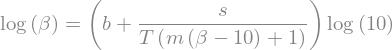

In [23]:
from sympy.abc import alpha, beta, s, m, T, f, g, h, R, b

func = sp.Eq(sp.log(beta), sp.log(10)*(s / (T*((beta - 10)*m + 1)) + b))
display(func)

## What's going on here????

This equation is a substitution of the lever function into the adjusted FWO linear function, which was to be optimized to determine the value of m.

It didn't work for the same reason the below cell throws an error: The equation has statements of both log(beta) and beta, so getting a simple expression is not possible.

## Well what do I do????

Now I am no math monkey, but I wonder if I can find and optimal value of m by stochastically guessing and just nudging it one way or the other. That would require me to know dR2/dm, which is tough if I have a nonlinear dependence of the fitting parameters and therefore residuals on beta.

SHOULD I JUST COMPUTE ALL REASONABLE VALUES O

In [25]:
rate = sp.solve(func, beta)
display(rate)

NotImplementedError: multiple generators [beta, log(beta)]
No algorithms are implemented to solve equation -(b + s/(T*(m*(beta - 10) + 1)))*log(10) + log(beta)